<a href="https://colab.research.google.com/github/shifubear/Hyperdimensional-Data-Modulation/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hyper-dimensional Modulation 

Can we transfer HD-based data? 

## What is it? 

Modulation  v 


## Resources 

- Signal to noise ratio [(wikipedia)](https://en.wikipedia.org/wiki/Signal-to-noise_ratio)


In [ ]:
## Load required packages 

from scipy import fft 
import numpy as np 
from keras.datasets import mnist 
import matplotlib.pyplot as plt

(train_X, train_y), (test_X, test_y) = mnist.load_data()


11501568/11490434 [==============================] - 0s 0us/step


## Modulation 



In [ ]:
def draw_mnist(data):
  plt.imshow(data.reshape(28, 28), cmap=plt.get_cmap('gray'))
  plt.show()


def error(V1, V2):
  total = 0
  for i in range(len(V1)):
    total += np.abs(V1[i] - V2[i])

  return total

class HDEncoder:
  """
  HD Encoder to encode given data as HD vectors 
  """
  def __init__(self, n, D = 10000): 
    self.n = n 
    self.D = D 
    self.B = [ np.random.randint(2, size=self.D) for i in range(self.n) ]
    for Bi in self.B: 
      for j in range(len(Bi)):
        if Bi[j] == 0:
          Bi[j] = -1
    self.H = np.zeros(self.D)
    self.original = []

  def encode(self, features):
    """
    Takes a 1xn feature vector and encodes it 
    """ 
    self.original = features 

    for i, f in enumerate(features): 
      self.H = self.H + f * self.B[i]

  def decode(self, iterations):
    features = np.zeros(self.n)

    for i in range(self.n):
      features[i] = np.round((self.H @ self.B[i]) / self.D)
    print("Iteration", 0)
    print("Variance:", np.var(features) / self.D)
    print(features[:20])
    draw_mnist(features)

    if iterations == 1:
      return features 

    # Preparation
    Fprev = features
    Hprev = self.H

    # Main loop 
    for i in range(1, iterations): 
      Fi = np.zeros(self.n)
      Hi = np.zeros(self.D)
      dH = np.zeros(self.D)
      Ei = np.zeros(self.n) 

      # Encoding step 
      for j, f in enumerate(Fprev):
        Hi = Hi + f * self.B[j]

      # Determine error 
      dH = self.H - Hi 

      # Value discovery 
      for j in range(self.n):
        Ei[j] = np.round((dH @ self.B[j]) / self.D)

      # Feature estimation 
      Fi = Fprev + Ei 

      # Update values 
      Hprev = Hi 
      Fprev = Fi 
      print("Iteration", i)
      print("Variance:", np.var(Fi) / self.D)
      print("Error:", error(Fi, self.original))
      print(Fi[:20])
      draw_mnist(Fi)

    return Fi 


Iteration 0
Variance: 0.6681819502290711
[-53.   2.  19.  -1.   3.  -3. -25. -17. -14.  16.  21.  -9.   7.  -9.
   7.   2.  -3. -28.  26. -27.]


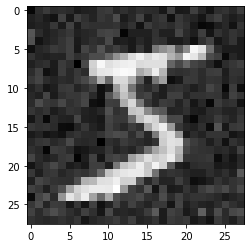

Iteration 1
Variance: 0.5525183723904102
Error: 5524.0
[ 11.   1.  -8.   9.   8.   3.  -3.   6.  -1.   0.  -3.   0.  10. -12.
   0.   3.  -1.   8.   0.   4.]


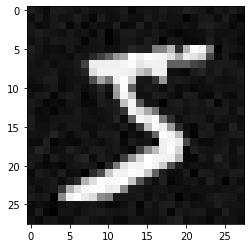

Iteration 2
Variance: 0.6391583166844544
Error: 2638.0
[-8.  1.  3.  1. -2.  1. -2. -4. -3.  3.  2. -2. -2.  1.  3.  3. -1. -1.
  2. -4.]


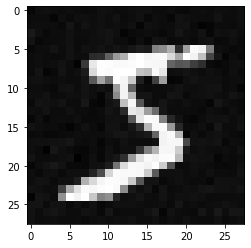

Iteration 3
Variance: 0.6211572860266555
Error: 1313.0
[ 3.  0. -1.  2.  3.  0. -1.  2.  0.  0.  0. -1.  3. -3.  0.  0. -1.  1.
  1.  2.]


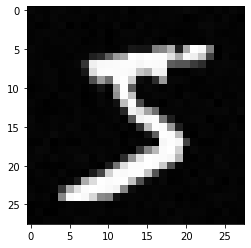

Iteration 4
Variance: 0.6362429430445647
Error: 673.0
[-2.  0.  0.  0. -1.  1.  0. -1. -1.  0.  0.  0. -1.  1.  1.  1. -1.  0.
  0. -1.]


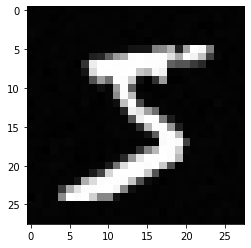

Iteration 5
Variance: 0.6315542090209807
Error: 348.0
[ 1.  0.  0.  0.  1.  0.  0.  1.  0.  0.  0.  0.  1. -1.  0.  0.  0.  0.
  0.  0.]


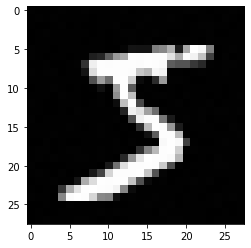

Iteration 6
Variance: 0.6352390800708039
Error: 137.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


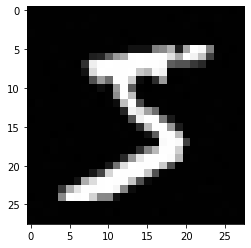

Iteration 7
Variance: 0.6341620703287694
Error: 10.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


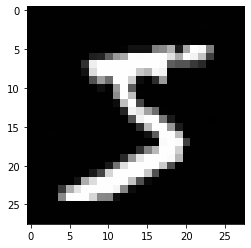

Iteration 8
Variance: 0.6343935949539254
Error: 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


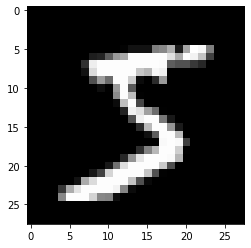

Iteration 9
Variance: 0.6343935949539254
Error: 0.0
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


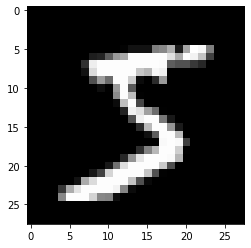

In [ ]:
# Test variables 
# train_X[0].reshape(1, 784)[0]
en = HDEncoder(28 * 28)
en.encode(train_X[0].reshape(1, 784)[0])
F1 = en.decode(10)

Iteration 0
Variance: 2.0155625
[  3.  -3. -52.  73.  -2. -23.  25.  -7. -39.  39.  21. -34.  21.  -9.
  -4. -11. -13.  -6.   2. -32.]


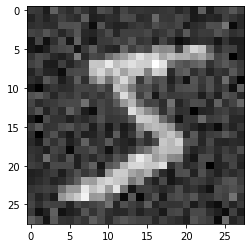

Iteration 1
Variance: 1.089521933813385
Error: 16050.0
[-11.  -7.  -2.   2.  -4.  11.  30.  11.  28. -11.   8. -43. -31. -21.
 -21. -18.  10.   5.  15. -21.]


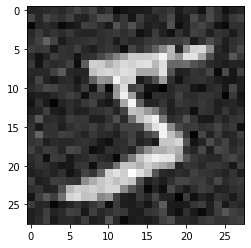

Iteration 2
Variance: 1.8675732832673886
Error: 13589.0
[  7.  11. -17.  29.   0. -15.  -2.  -5. -31.  16.   3.   5.  33.  -6.
  -3.  10. -20.  -4.   1.  12.]


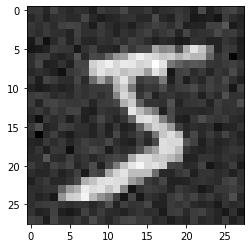

Iteration 3
Variance: 1.3636669124681122
Error: 11726.0
[ -6. -15.  -1.  -4. -12.  12.  21.   7.  24. -10.   5. -27. -36.  -7.
  -6. -20.  17.   5.   3. -18.]


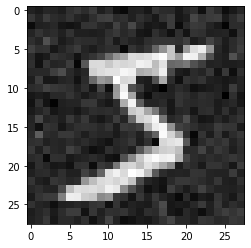

Iteration 4
Variance: 1.8317688446871097
Error: 11029.0
[  5.  19.  -4.  13.   8. -14. -11.  -6. -24.   9.   0.  10.  37.  -3.
  -1.  17. -20.  -4.   3.  18.]


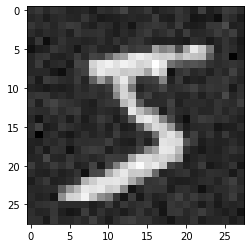

In [ ]:
# Test variables 
# train_X[0].reshape(1, 784)[0]
en = HDEncoder(28 * 28, D=4000)
en.encode(train_X[0].reshape(1, 784)[0])
F1 = en.decode(5)